In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
data = diabetes.data
label = diabetes.target
columns = diabetes.feature_names

In [5]:
data = pd.DataFrame(data, columns = columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
data.shape

(442, 10)

In [7]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size = 0.2, random_state = 2023)

In [9]:
# 혈당 수치
sim_lr.fit(X_train['s6'].values.reshape((-1,1)), y_train)

LinearRegression()

In [10]:
y_pred = sim_lr.predict(X_test['s6'].values.reshape((-1,1)))

In [11]:
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))
print('단순 선형 회귀 계수(w): {:.2f}, 절편(b): {:.2f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

단순 선형 회귀, R2: 0.16
단순 선형 회귀 계수(w): 586.70, 절편(b): 152.60


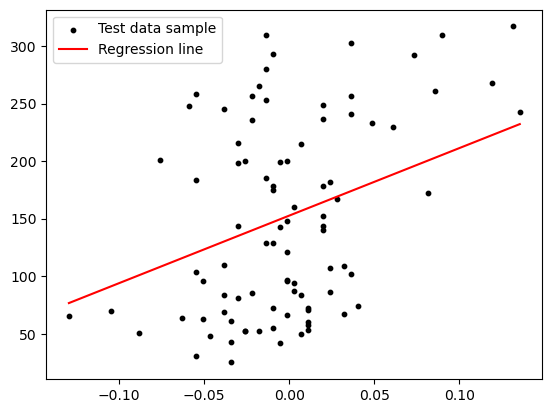

In [12]:
# linear line의 생성
line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
line_y = sim_lr.predict(line_x.reshape((-1,1)))


# Test data를 표현
plt.scatter(X_test['s6'], y_test, s=10, c='black') # s=size
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample', 'Regression line'])

In [13]:
# Multiple Linear Regression
mul_lr = LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test)

In [14]:
print('다중 선형 회귀, R2:{:.2f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2:0.50


In [15]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

In [16]:
dt_regr.fit(X_train['s6'].values.reshape((-1,1)), y_train)

DecisionTreeRegressor(max_depth=5)

In [17]:
y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

In [18]:
print('단순 결정 트리 회귀 R2: {:.2f}'.format(r2_score(y_test, y_pred)))

단순 결정 트리 회귀 R2: 0.14


[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[118.41176471 118.41176471 118.41176471 125.75       118.63636364
 150.42857143 197.57692308 202.66666667 202.66666667 263.        ]


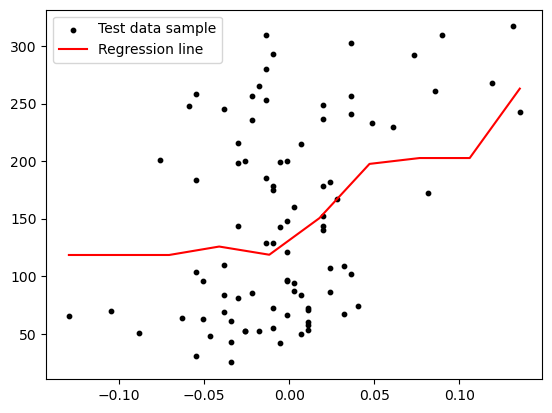

In [19]:
#linear line의 생성
line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
line_y = dt_regr.predict(line_x.reshape((-1,1)))

print(line_x)
print(line_y)

#Test data를 표현 
plt.scatter(X_test['s6'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test data sample','Regression line'])

In [20]:
mt_regre = DecisionTreeRegressor(max_depth=3)
mt_regre.fit(X_train, y_train)
y_pred = mt_regre.predict(X_test)
print('다중 결정 트리 회귀, r2: {:.2f}'.format(r2_score(y_test, y_pred)))

다중 결정 트리 회귀, r2: 0.35


In [21]:
# Support Vector Machine Regressor
from sklearn.svm import SVR
svm_regre = SVR()
svm_regre.fit(X_train['s6'].values.reshape((-1,1)), y_train)
y_pred = svm_regre.predict(X_test['s6'].values.reshape((-1,1)))
print('단순 서포트 벡터 머신 회귀, R2: {:.2f}'.format(r2_score(y_test, y_pred)))

단순 서포트 벡터 머신 회귀, R2: 0.06


In [22]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  m_regr = SVR(C=i)
  m_regr.fit(X_train, y_train)
  y_pred = m_regr.predict(X_test)
  print('다중 서포트 벡터 머신 회귀,i={} R2: {:.2f}'.format(i, r2_score(y_test, y_pred)))

다중 서포트 벡터 머신 회귀,i=1 R2: 0.17
다중 서포트 벡터 머신 회귀,i=2 R2: 0.29
다중 서포트 벡터 머신 회귀,i=3 R2: 0.35
다중 서포트 벡터 머신 회귀,i=4 R2: 0.39
다중 서포트 벡터 머신 회귀,i=5 R2: 0.42
다중 서포트 벡터 머신 회귀,i=6 R2: 0.44
다중 서포트 벡터 머신 회귀,i=7 R2: 0.46
다중 서포트 벡터 머신 회귀,i=8 R2: 0.47
다중 서포트 벡터 머신 회귀,i=9 R2: 0.48
다중 서포트 벡터 머신 회귀,i=10 R2: 0.49
다중 서포트 벡터 머신 회귀,i=11 R2: 0.49
다중 서포트 벡터 머신 회귀,i=12 R2: 0.50
다중 서포트 벡터 머신 회귀,i=13 R2: 0.50
다중 서포트 벡터 머신 회귀,i=14 R2: 0.50
다중 서포트 벡터 머신 회귀,i=15 R2: 0.50
다중 서포트 벡터 머신 회귀,i=16 R2: 0.50
다중 서포트 벡터 머신 회귀,i=17 R2: 0.50
다중 서포트 벡터 머신 회귀,i=18 R2: 0.50
다중 서포트 벡터 머신 회귀,i=19 R2: 0.50
다중 서포트 벡터 머신 회귀,i=20 R2: 0.50


In [24]:
# Multi Layer Perceptron Regressor
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=200, max_iter=1000)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)
print('다중 MLP 회귀 R2: {:.2f}'.format(r2_score(y_test, y_pred)))

다중 MLP 회귀 R2: 0.48


C:\Users\ljh29\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
